In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import yfinance as yf
import requests

In [2]:
print(matplotlib.__file__)
#問題: 明明有照著步驟做，為什麼讀不到
#解決方案: 放錯資料夾

D:\Users\wilson\anaconda3\envs\geo_env\lib\site-packages\matplotlib\__init__.py


In [3]:
TSMCDataList = pd.read_csv('./台積電股票2020資料.csv')
TSMCDataList = TSMCDataList.reindex(index = TSMCDataList.index[::-1])
TSMCDataList = TSMCDataList.reset_index(drop = True)
TSMCDataList

,Date,Open,High,Low,Close,Change,Change%,Volume('000 shares)
0,2020/01/02,332.5,339.0,332.5,339.0,8.0,2.42,33282.120
1,2020/01/03,344.0,345.0,335.5,339.5,0.5,0.15,42023.268
2,2020/01/06,333.0,334.5,332.0,332.0,-7.5,-2.21,45677.057
3,2020/01/07,332.5,333.0,326.5,329.5,-2.5,-0.75,51746.181
4,2020/01/08,325.0,333.0,325.0,329.5,0.0,0.00,37913.748
...,...,...,...,...,...,...,...,...
240,2020/12/25,514.0,515.0,510.0,511.0,1.0,0.20,12581.145
241,2020/12/28,512.0,515.0,509.0,515.0,4.0,0.78,19520.886
242,2020/12/29,515.0,517.0,513.0,515.0,0.0,0.00,20226.736
243,2020/12/30,516.0,525.0,514.0,525.0,10.0,1.94,46705.107


In [4]:
HTCDataList = pd.read_csv('./宏達電股票2020資料.csv')
HTCDataList = HTCDataList.reindex(index = HTCDataList.index[::-1])
HTCDataList = HTCDataList.reset_index(drop = True)
HTCDataList

,Date,Open,High,Low,Close,Change,Change%,Volume('000 shares)
0,2020/01/02,38.75,38.85,38.35,38.35,-0.10,-0.26,4756.833
1,2020/01/03,38.55,38.70,37.80,38.15,-0.20,-0.52,7331.751
2,2020/01/06,38.20,38.55,38.10,38.20,0.05,0.13,4543.386
3,2020/01/07,38.40,38.50,36.95,37.00,-1.20,-3.14,9037.744
4,2020/01/08,36.50,36.80,36.15,36.15,-0.85,-2.30,5734.002
...,...,...,...,...,...,...,...,...
240,2020/12/25,30.65,30.95,30.50,30.55,0.25,0.83,4370.212
241,2020/12/28,30.65,31.40,30.60,31.20,0.65,2.13,6174.619
242,2020/12/29,31.35,31.80,31.20,31.30,0.10,0.32,6529.033
243,2020/12/30,31.55,31.60,31.05,31.25,-0.05,-0.16,5244.252


In [5]:
HonHaiDataList = pd.read_csv('./鴻海股票2020資料.csv')
HonHaiDataList = HonHaiDataList.reindex(index = HonHaiDataList.index[::-1])
HonHaiDataList = HonHaiDataList.reset_index(drop = True)
HonHaiDataList

,Date,Open,High,Low,Close,Change,Change%,Volume('000 shares)
0,2020/01/02,91.0,91.5,90.3,90.8,0.0,0.00,20758.722
1,2020/01/03,91.4,92.2,90.8,91.6,0.8,0.88,37936.877
2,2020/01/06,91.1,91.1,90.1,90.5,-1.1,-1.20,26352.522
3,2020/01/07,90.5,91.0,88.3,89.1,-1.4,-1.55,43978.140
4,2020/01/08,87.9,88.1,86.5,86.5,-2.6,-2.92,56101.121
...,...,...,...,...,...,...,...,...
240,2020/12/25,90.9,92.2,90.8,91.8,2.2,2.46,114607.503
241,2020/12/28,92.4,93.0,91.8,91.8,0.0,0.00,67626.965
242,2020/12/29,91.8,91.8,90.4,90.4,-1.4,-1.53,46148.101
243,2020/12/30,91.0,91.6,90.1,91.6,1.2,1.33,40526.518


In [6]:
monthCounts = []
for time in range(12):
    monthCounts.append(0)
monthStarts = []
for stockData in TSMCDataList["Date"]:
    for month in range(1, 13):
        monthString = ""
        if month < 10:
            monthString += ("0" + str(month))
        else:
            monthString += str(month)
        if stockData[5:7] == monthString:
            monthCounts[month-1] += 1
total = 0
for monthCount in monthCounts:
    monthStarts.append(total)
    total += monthCount
monthStarts

[0, 15, 34, 56, 76, 96, 116, 139, 160, 182, 201, 222]

In [7]:
monthNames = []
for month in range(12):
    monthNames.append(str(month+1) + "月")
monthNames

['1月', '2月', '3月', '4月', '5月', '6月', '7月', '8月', '9月', '10月', '11月', '12月']

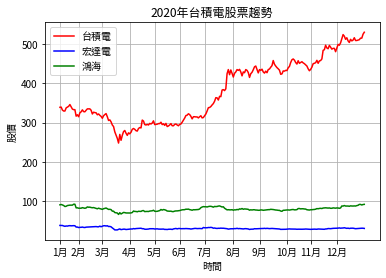

In [8]:
#載入中文套件
plt.rcParams['font.sans-serif'] = ['Noto Sans TC']
#NotoSansTC、Noto Sans TC

plt.plot(TSMCDataList["Date"], TSMCDataList["Close"], color = "r", label = "台積電")
plt.plot(HTCDataList["Date"], HTCDataList["Close"], color = "b", label = "宏達電")
plt.plot(HonHaiDataList["Date"], HonHaiDataList["Close"], color = "g", label = "鴻海")
plt.gca().set_xticks(monthStarts)
plt.gca().set_xticklabels(monthNames)
plt.grid(True)
plt.xlabel("時間")
plt.ylabel("股價")
plt.title("2020年台積電股票趨勢")
plt.legend()

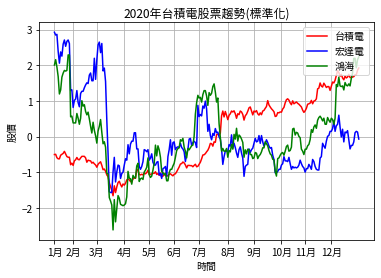

In [9]:
#Z分數標準化(Z-Score Standardization)
stdTSMCDataList = preprocessing.scale(TSMCDataList["Close"], axis = 0, with_mean = True, with_std = True, copy = True)
stdHTCDataList = preprocessing.scale(HTCDataList["Close"], axis = 0, with_mean = True, with_std = True, copy = True)
stdHonHaiDataList = preprocessing.scale(HonHaiDataList["Close"], axis = 0, with_mean = True, with_std = True, copy = True)

plt.plot(TSMCDataList["Date"], stdTSMCDataList, color = "r", label = "台積電")
plt.plot(HTCDataList["Date"], stdHTCDataList, color = "b", label = "宏達電")
plt.plot(HonHaiDataList["Date"], stdHonHaiDataList, color = "g", label = "鴻海")
plt.gca().set_xticks(monthStarts)
plt.gca().set_xticklabels(monthNames)
plt.grid(True)
plt.xlabel("時間")
plt.ylabel("股價")
plt.title("2020年台積電股票趨勢(標準化)")
plt.legend(loc = "upper right")

In [10]:
#Max-Min標準化
trainDataLists = []
for index in range(len(TSMCDataList["Close"])):
    trainRowData = []
    trainRowData.append(TSMCDataList["Close"][index])
    trainRowData.append(HTCDataList["Close"][index])
    trainRowData.append(HonHaiDataList["Close"][index])
    trainDataLists.append(trainRowData)
trainDataLists

[[339.0, 38.35, 90.8],
 [339.5, 38.15, 91.6],
 [332.0, 38.2, 90.5],
 [329.5, 37.0, 89.1],
 [329.5, 36.15, 86.5],
 [337.5, 36.95, 87.1],
 [339.5, 36.65, 89.0],
 [341.5, 37.5, 89.6],
 [346.0, 37.8, 90.0],
 [340.0, 37.35, 89.9],
 [334.5, 37.7, 90.0],
 [333.0, 37.8, 92.3],
 [333.0, 37.55, 92.3],
 [316.5, 34.2, 83.1],
 [320.0, 34.25, 83.2],
 [315.0, 33.0, 82.2],
 [325.0, 33.5, 82.2],
 [327.5, 33.6, 82.2],
 [332.5, 34.2, 83.6],
 [328.0, 33.35, 82.9],
 [327.5, 33.05, 82.0],
 [331.5, 34.0, 82.9],
 [335.0, 34.15, 85.5],
 [335.0, 34.15, 84.7],
 [335.0, 34.4, 84.9],
 [331.5, 34.6, 83.9],
 [322.0, 34.75, 83.4],
 [326.5, 34.7, 83.8],
 [325.5, 35.3, 82.8],
 [325.0, 35.45, 81.7],
 [320.0, 34.9, 80.7],
 [322.0, 34.9, 82.3],
 [318.5, 36.5, 81.1],
 [316.0, 35.0, 80.3],
 [311.0, 36.4, 79.2],
 [317.5, 37.45, 81.0],
 [320.5, 37.65, 81.7],
 [323.0, 36.9, 82.7],
 [315.0, 37.55, 80.8],
 [305.5, 35.6, 79.1],
 [307.0, 35.8, 79.4],
 [302.0, 34.85, 78.6],
 [294.0, 32.1, 74.7],
 [290.0, 29.75, 74.6],
 [276.5, 27.0

In [11]:
scaler = MinMaxScaler()
scaler.fit(trainDataLists)
stdDataLists = scaler.transform(trainDataLists)
stdDataLists

array([[0.32269504, 1.        , 0.94230769],
       [0.32446809, 0.98245614, 0.97307692],
       [0.29787234, 0.98684211, 0.93076923],
       [0.28900709, 0.88157895, 0.87692308],
       [0.28900709, 0.80701754, 0.77692308],
       [0.31737589, 0.87719298, 0.8       ],
       [0.32446809, 0.85087719, 0.87307692],
       [0.33156028, 0.9254386 , 0.89615385],
       [0.34751773, 0.95175439, 0.91153846],
       [0.32624113, 0.9122807 , 0.90769231],
       [0.30673759, 0.94298246, 0.91153846],
       [0.30141844, 0.95175439, 1.        ],
       [0.30141844, 0.92982456, 1.        ],
       [0.2429078 , 0.63596491, 0.64615385],
       [0.25531915, 0.64035088, 0.65      ],
       [0.23758865, 0.53070175, 0.61153846],
       [0.27304965, 0.5745614 , 0.61153846],
       [0.28191489, 0.58333333, 0.61153846],
       [0.29964539, 0.63596491, 0.66538462],
       [0.28368794, 0.56140351, 0.63846154],
       [0.28191489, 0.53508772, 0.60384615],
       [0.29609929, 0.61842105, 0.63846154],
       [0.

In [12]:
stdTSMCDataList = []
stdHTCDataList = []
stdHonHaiDataList = []
for rowData in stdDataLists:
    stdTSMCDataList.append(rowData[0])
    stdHTCDataList.append(rowData[1])
    stdHonHaiDataList.append(rowData[2])

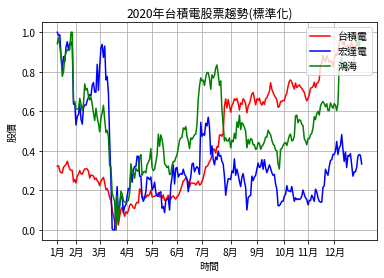

In [13]:
plt.plot(TSMCDataList["Date"], stdTSMCDataList, color = "r", label = "台積電")
plt.plot(HTCDataList["Date"], stdHTCDataList, color = "b", label = "宏達電")
plt.plot(HonHaiDataList["Date"], stdHonHaiDataList, color = "g", label = "鴻海")
plt.gca().set_xticks(monthStarts)
plt.gca().set_xticklabels(monthNames)
plt.grid(True)
plt.xlabel("時間")
plt.ylabel("股價")
plt.title("2020年台積電股票趨勢(標準化)")
plt.legend(loc = "upper right")

In [14]:
def GetAndPrintStockInfo():
    link = 'https://quality.data.gov.tw/dq_download_json.php?nid=11549&md5_url=bb878d47ffbe7b83bfc1b41d0b24946e'
    request = requests.get(link)
    stockList = pd.DataFrame(request.json())
    stockList = stockList[["證券代號", "證券名稱"]]
    for i in stockList.index:
        stockList.loc[i, "證券代號"] += ".TW"
    print(stockList)
    return stockList

In [15]:
def SearchStockInfoByStockName(stockName, stockList):
    stockNameList = []
    stockCodeList = []
    for i in stockList.index:
        if stockList.loc[i, "證券名稱"].find(stockName) != -1:
            print("證券名稱: " + stockList.loc[i, "證券名稱"])
            print("證券代號: " + stockList.loc[i, "證券代號"])
            print(yf.download(tickers = stockList.loc[i, "證券代號"], start = '2020-01-01', end = '2020-01-10', interval = '1d'))

In [16]:
def GetStockInfoByStockCodeAndStartDateAndEndDate(stockCode, startDate, endDate):
    return yf.download(tickers = stockCode, start = startDate, end = endDate, interval = '1d')

In [17]:
stockList = GetAndPrintStockInfo()
SearchStockInfoByStockName("富邦", stockList)

         證券代號     證券名稱
0     0050.TW   元大台灣50
1     0051.TW  元大中型100
2     0052.TW     富邦科技
3     0053.TW     元大電子
4     0054.TW   元大台商50
...       ...      ...
1118  9944.TW       新麗
1119  9945.TW      潤泰新
1120  9946.TW     三發地產
1121  9955.TW       佳龍
1122  9958.TW      世紀鋼

[1123 rows x 2 columns]
證券名稱: 富邦科技
證券代號: 0052.TW
[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2020-01-02  72.300003  73.449997  72.300003  73.300003  73.300003  139747
2020-01-03  74.000000  74.449997  72.650002  72.849998  72.849998  147504
2020-01-06  72.000000  72.250000  72.000000  72.050003  72.050003  138657
2020-01-07  72.099998  79.250000  71.000000  71.800003  71.800003  180844
2020-01-08  71.000000  71.849998  70.800003  71.250000  71.250000  183437
2020-01-09  72.199997  72.699997  72.000000  72.449997  72.449997  127110
證券名稱: 富邦摩台
證券

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2020-01-02  30.500000  30.500000  30.100000  30.379999  30.379999  199000
2020-01-03  30.719999  30.809999  30.330000  30.370001  30.370001  251000
2020-01-06  30.299999  30.299999  29.549999  29.629999  29.629999  266000
2020-01-07  29.629999  29.930000  29.570000  29.820000  29.820000  213000
2020-01-08  29.400000  29.400000  28.799999  29.180000  29.180000  558000
2020-01-09  29.639999  30.059999  29.629999  30.049999  30.049999  468000
證券名稱: 富邦印度反1
證券代號: 00654R.TW
[*********************100%***********************]  1 of 1 completed
             Open   High    Low  Close  Adj Close  Volume
Date                                                     
2020-01-02  12.95  12.95  12.95  12.95      12.95    5000
2020-01-03  12.90  13.00  12.90  13.00      13.00    5000
2020-01-0

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2020-01-02  19.570000  19.580000  19.540001  19.580000  19.580000  1616351
2020-01-03  19.610001  19.660000  19.610001  19.639999  19.639999  1133744
2020-01-06  19.660000  19.719999  19.660000  19.719999  19.719999  1528519
2020-01-07  19.730000  19.740000  19.719999  19.730000  19.730000  1006542
2020-01-08  19.730000  19.730000  19.690001  19.719999  19.719999  1166857
2020-01-09  19.719999  19.719999  19.700001  19.709999  19.709999   970864
證券名稱: 富邦臺灣優質高息
證券代號: 00730.TW
[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2020-01-02  18.440001  18.500000  18.420000  18.480000  18.480000  363889
2020-01-03

In [18]:
fubonStock = GetStockInfoByStockCodeAndStartDateAndEndDate("0052.TW", "2020-12-07", "2021-12-31")
fubonStock.reset_index(inplace=True)
fubonStock

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-07,106.400002,107.400002,105.449997,107.199997,107.199997,1341137
1,2020-12-08,108.050003,109.199997,106.900002,109.150002,109.150002,1134142
2,2020-12-09,109.000000,109.199997,108.699997,108.949997,108.949997,1565579
3,2020-12-10,107.500000,107.849998,106.449997,107.050003,107.050003,1553689
4,2020-12-11,107.050003,107.300003,105.199997,107.000000,107.000000,1331578
...,...,...,...,...,...,...,...
257,2021-12-24,131.500000,132.149994,131.500000,131.500000,131.500000,367158
258,2021-12-27,132.000000,132.949997,131.699997,132.500000,132.500000,478682
259,2021-12-28,132.800003,133.750000,132.800003,133.699997,133.699997,457926
260,2021-12-29,133.750000,134.449997,133.699997,134.199997,134.199997,465103


In [19]:
fubonStock.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-07,106.400002,107.400002,105.449997,107.199997,107.199997,1341137
1,2020-12-08,108.050003,109.199997,106.900002,109.150002,109.150002,1134142
2,2020-12-09,109.000000,109.199997,108.699997,108.949997,108.949997,1565579
3,2020-12-10,107.500000,107.849998,106.449997,107.050003,107.050003,1553689
4,2020-12-11,107.050003,107.300003,105.199997,107.000000,107.000000,1331578
5,2020-12-14,106.699997,106.699997,105.800003,106.150002,106.150002,1124072
6,2020-12-15,106.000000,106.099998,104.949997,105.000000,105.000000,1037292
7,2020-12-16,105.300003,106.900002,105.300003,106.750000,106.750000,1162068
8,2020-12-17,106.750000,107.050003,106.150002,106.599998,106.599998,957301
9,2020-12-18,106.599998,106.650002,106.000000,106.000000,106.000000,1009995


In [20]:
monthCounts = []
for time in range(12):
    monthCounts.append(0)
monthStarts = []
for stockData in fubonStock["Date"]:
    for month in range(1, 13):
        monthString = ""
        if month < 10:
            monthString += ("0" + str(month))
        else:
            monthString += str(month)
        if stockData[5:7] == monthString:
            monthCounts[month-1] += 1
total = 0
for monthCount in monthCounts:
    monthStarts.append(total)
    total += monthCount
monthStarts
#寫作業三會用到
#參考網址: https://pandas.pydata.org/pandas-docs/version/0.25.3/user_guide/timeseries.html

TypeError: 'Timestamp' object is not subscriptable

In [21]:
monthCounts = []
for time in range(12):
    monthCounts.append(0)
monthStarts = []
for stockData in fubonStock["Date"][19:]:
    for month in range(1, 13):
        if stockData.month == month:
            monthCounts[month-1] += 1
total = 0
for monthCount in monthCounts:
    monthStarts.append(total)
    total += monthCount
monthStarts

[0, 20, 33, 55, 73, 94, 115, 137, 159, 179, 199, 221]

In [22]:
fubonStock["MA5"] = fubonStock["Close"].rolling(5).mean()
fubonStock["MA20"] = fubonStock["Close"].rolling(20).mean()
fubonStock.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume,MA5,MA20
0,2020-12-07,106.400002,107.400002,105.449997,107.199997,107.199997,1341137,NaN,NaN
1,2020-12-08,108.050003,109.199997,106.900002,109.150002,109.150002,1134142,NaN,NaN
2,2020-12-09,109.000000,109.199997,108.699997,108.949997,108.949997,1565579,NaN,NaN
3,2020-12-10,107.500000,107.849998,106.449997,107.050003,107.050003,1553689,NaN,NaN
4,2020-12-11,107.050003,107.300003,105.199997,107.000000,107.000000,1331578,107.870000,NaN
5,2020-12-14,106.699997,106.699997,105.800003,106.150002,106.150002,1124072,107.660001,NaN
6,2020-12-15,106.000000,106.099998,104.949997,105.000000,105.000000,1037292,106.830000,NaN
7,2020-12-16,105.300003,106.900002,105.300003,106.750000,106.750000,1162068,106.390001,NaN
8,2020-12-17,106.750000,107.050003,106.150002,106.599998,106.599998,957301,106.300000,NaN
9,2020-12-18,106.599998,106.650002,106.000000,106.000000,106.000000,1009995,106.100000,NaN


In [23]:
#MA5 > MA20: buy yellow
#MA5 < MA20: sell green
yellowScatterIndex = []
yellowScatterPrice = []
greenScatterIndex = []
greenScatterPrice = []
for index in range(len(fubonStock["MA20"][19:])-1):
    if (fubonStock["MA5"][index + 19] < fubonStock["MA20"][index + 19]) and (fubonStock["MA5"][index + 20] > fubonStock["MA20"][index + 20]):
        yellowScatterIndex.append(index)
        yellowScatterPrice.append((fubonStock["MA5"][index + 19] + fubonStock["MA5"][index + 20] + fubonStock["MA20"][index + 19] + fubonStock["MA20"][index + 20]) / 4)
    elif (fubonStock["MA5"][index + 19] > fubonStock["MA20"][index + 19]) and (fubonStock["MA5"][index + 20] < fubonStock["MA20"][index + 20]):
        greenScatterIndex.append(index)
        greenScatterPrice.append((fubonStock["MA5"][index + 19] + fubonStock["MA5"][index + 20] + fubonStock["MA20"][index + 19] + fubonStock["MA20"][index + 20]) / 4)

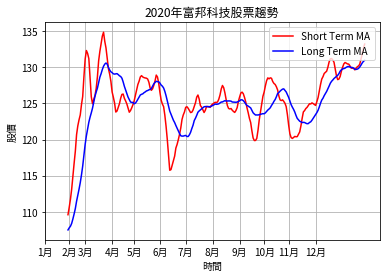

In [24]:
plt.plot(fubonStock.index[19:], fubonStock["MA5"][19:], color = "r", label = "Short Term MA")
plt.plot(fubonStock.index[19:], fubonStock["MA20"][19:], color = "b", label = "Long Term MA")
plt.gca().set_xticks(monthStarts)
plt.gca().set_xticklabels(monthNames)
plt.grid(True)
plt.xlabel("時間")
plt.ylabel("股價")
plt.title("2020年富邦科技股票趨勢")
plt.legend(loc = "upper right")
#問題: 如果index是從19開始的話，整個線會偏離到2月去，不過，index跟日期沒有什麼關係，所以從頭開始是沒問題的，只要抓好要顯示資料的量就好
#作業三會用到

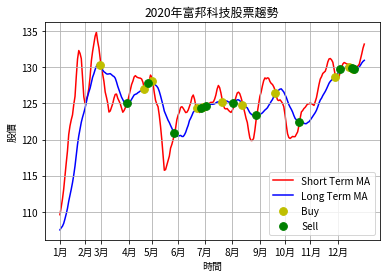

In [26]:
plt.scatter(greenScatterIndex, greenScatterPrice, color = "y", label = "Buy", zorder = 2, s = 60)
plt.scatter(yellowScatterIndex, yellowScatterPrice, color = "g", label = "Sell", zorder = 2, s = 60)
plt.plot(fubonStock.index[:-19], fubonStock["MA5"][19:], color = "r", label = "Short Term MA", zorder = 1)
plt.plot(fubonStock.index[:-19], fubonStock["MA20"][19:], color = "b", label = "Long Term MA", zorder = 1)
plt.gca().set_xticks(monthStarts)
plt.gca().set_xticklabels(monthNames)
plt.grid(True)
plt.xlabel("時間")
plt.ylabel("股價")
plt.title("2020年富邦科技股票趨勢")
plt.legend(loc = "lower right")
#困難: 點點沒辦法精準點到位置

https://zhuanlan.zhihu.com/p/371079405

https://www.analyticsvidhya.com/blog/2021/06/download-financial-dataset-using-yahoo-finance-in-python-a-complete-guide/

https://pythonviz.com/finance/yfinance-download-stock-data/

https://aronhack.com/zh/retrieve-stock-historical-data-with-python-and-yahoo-finance-api/

https://selflearningsuccess.com/pythonstring/